In [1]:
import pandas as pd
import glob
from tqdm.notebook import tqdm
import time
import datetime
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import matplotlib.dates as mdates
import numpy as np
import warnings
warnings.filterwarnings("ignore")

In [2]:
path = "C:/Users/gianl/Desktop/Gi/Supsi/MartaLauraGiada/Laura/Tweets/"

In [3]:
tweets = pd.read_parquet(path + "tweets_with_urls_and_domain_and_score (3.0).parquet", engine = "fastparquet")

In [5]:
tweets = tweets[~tweets["urls"].str.contains("twitter.com")]
tweets

,id,id_str,created_at,user_id,user_screen_name,user_verified,user_created_at,text,source,coordinates,...,media,user_tweets_count,user_friends_count,user_followers_count,domain,number_of_urls,LOW,HIGH,UNKW,SOCIAL
0,1221737654909382662,1221737654909382662,Mon Jan 27 10:12:10 +0000 2020,589884969,LecceSette,False,Fri May 25 08:09:46 +0000 2012,"Minaccia morbillo nel Salento, Asl: ""Vaccinars...","<a href=""https://ifttt.com"" rel=""nofollow"">IFT...",None,...,[],NaN,NaN,NaN,[leccesette.it],1,0,0,1,0
1,1221738978585563136,1221738978585563136,Mon Jan 27 10:17:25 +0000 2020,166708308,Asgard_Hydra,False,Wed Jul 14 20:31:11 +0000 2010,Ricercatori a lavoro per produrre vaccino cont...,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",None,...,[],NaN,NaN,NaN,[tech.everyeye.it],1,0,0,1,0
3,1221735550585053186,1221735550585053186,Mon Jan 27 10:03:48 +0000 2020,1019640307065982979,CeSPI_Roma,False,Wed Jul 18 17:49:28 +0000 2018,Per chi crede nella democrazia nel rispetto de...,"<a href=""https://mobile.twitter.com"" rel=""nofo...",None,...,"[{'id': 1221735545799352322, 'id_str': '122173...",NaN,NaN,NaN,[cespi.it],1,0,0,1,0
6,1221737274108469248,1221737274108469248,Mon Jan 27 10:10:39 +0000 2020,1622970242,Intuitizioni,False,Fri Jul 26 13:32:45 +0000 2013,"https://t.co/oNhi3KHwgx\n \n""la fondazione del...","<a href=""https://mobile.twitter.com"" rel=""nofo...",None,...,[],NaN,NaN,NaN,[lacrunadellago.net],1,1,0,0,0
7,1221736713355173891,1221736713355173891,Mon Jan 27 10:08:25 +0000 2020,605246031,OtticaSilverio,False,Mon Jun 11 06:15:33 +0000 2012,"""La memoria è l’unico vaccino contro\nl’indiff...","<a href=""https://ifttt.com"" rel=""nofollow"">IFT...",None,...,"[{'id': 1221736712335962112, 'id_str': '122173...",NaN,NaN,NaN,[instagram.com],1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1030906,1394609978980319232,1394609978980319232,Tue May 18 11:05:04 +0000 2021,2197175103,grecale66,False,Tue Nov 26 18:05:12 +0000 2013,"Vaccino Covid, nuovo errore di somministrazion...","<a href=""https://mobile.twitter.com"" rel=""nofo...",None,...,[],116242.0,2382.0,1873.0,[imolaoggi.it],1,1,0,0,0
1030907,1394609850089345025,1394609850089345025,Tue May 18 11:04:33 +0000 2021,71210454,tuttoggi,False,Thu Sep 03 09:01:38 +0000 2009,Anche i carabinieri del Nas potrebbero interes...,"<a href=""https://www.postpickr.com"" rel=""nofol...",None,...,[],93104.0,228.0,3744.0,[tuttoggi.info],1,0,0,1,0
1030908,1394609946881298432,1394609946881298432,Tue May 18 11:04:56 +0000 2021,2926782875,Mustapha1508,False,Wed Dec 17 10:59:26 +0000 2014,"Vaccino, dopo il caso della 23enne un altro er...","<a href=""http://twitter.com/download/iphone"" r...",None,...,[],50672.0,5003.0,3923.0,[csera.it],1,0,1,0,0
1030909,1394610031262306304,1394610031262306304,Tue May 18 11:05:16 +0000 2021,4309630395,Ileana0406,False,Sat Nov 28 18:18:40 +0000 2015,"Vaccini, nuovo errore di somministrazione in T...","<a href=""http://twitter.com/download/iphone"" r...",None,...,[],21105.0,1130.0,833.0,[tgcom24.mediaset.it],1,0,1,0,0


In [6]:
def process_datetime(data):
    if ((data == "nan") or (data == "False") or (data == "None")):
        month = "01"
        day = "01"
        year = "2006"
    else:
        x = data.split()
        month = str(time.strptime(x[1], '%b').tm_mon)
        day = str(x[2])
        year = str(x[5])
    formatted_data = day + "-" + month + "-" + year
    data = str(datetime.datetime.strptime(formatted_data, '%d-%m-%Y')).split()[0]
    return data

In [7]:
dates = []
for i in tqdm(tweets["created_at"]):
    dates.append(process_datetime(i))

In [11]:
tweets["dates"] = dates
tweets['date_tweets']= tweets.groupby(['dates'])['created_at'].transform('size')
tweets_for_plot = tweets.drop_duplicates(subset='dates')

<ipython-input-56-78acfaf0db22>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_for_plot.sort_values(by=["dates"], ascending=True, inplace=True)


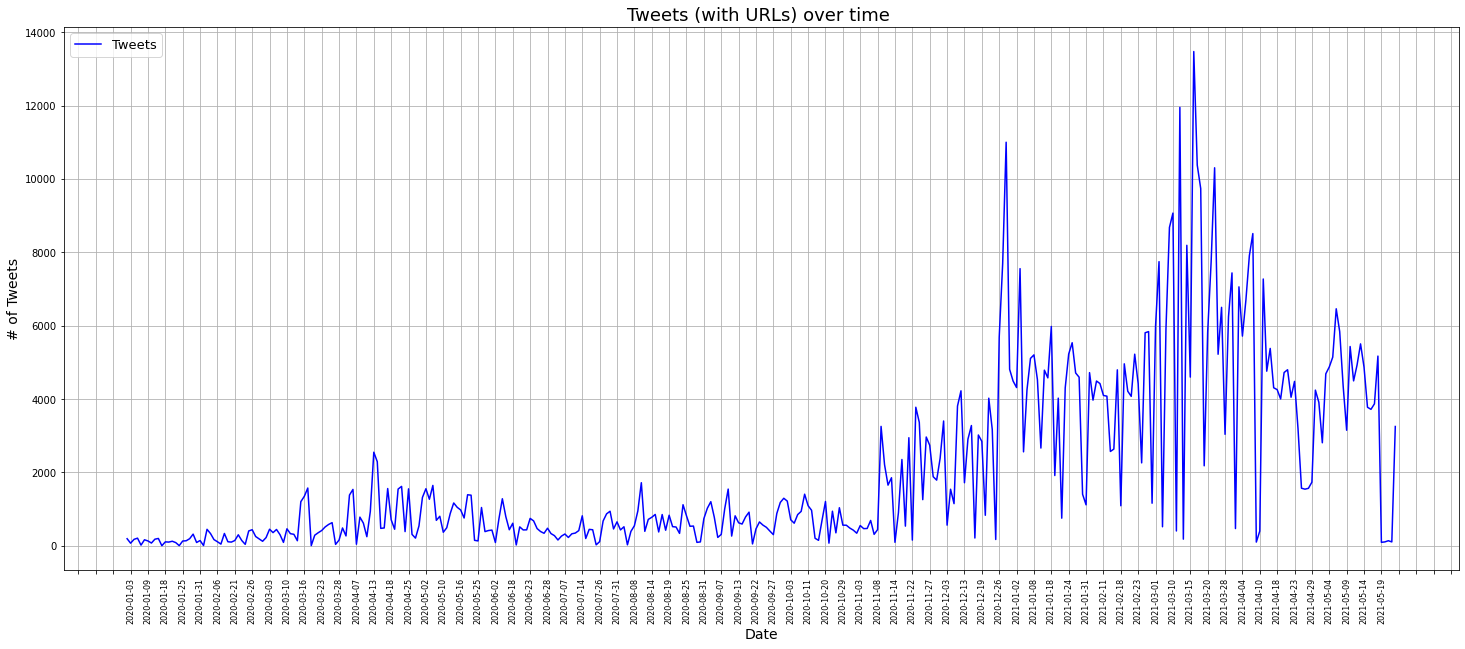

In [56]:
fig, ax = plt.subplots(figsize=(25, 10))
plt.title('Tweets (with URLs) over time ', fontsize=18)
tweets_for_plot.sort_values(by=["dates"], ascending=True, inplace=True)

ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('# of Tweets', fontsize=14)

plt.plot(tweets_for_plot['dates'], tweets_for_plot['date_tweets'], c='b', label='Tweets')
# set monthly locator
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
# set formatter
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
# set font and rotation for date tick labels
plt.xticks(rotation='vertical', fontsize = 8) 
plt.legend(loc='upper left', fontsize=13);
plt.grid()
plt.show()

#### Mesi sul totale

In [54]:
print(f"{round(count/len(tweets)*100,2)}%")

13.06%


In [52]:
print(f"{round(count/len(tweets)*100,2)}%")

10.47%


In [46]:
print(f"{round(count/len(tweets)*100,2)}%")

21.78%


In [48]:
print(f"{round(count/len(tweets)*100,2)}%")

14.86%


In [50]:
print(f"{round(count/len(tweets)*100,2)}%")

12.2%


In [10]:
low = tweets[tweets["LOW"]>0]
low['date_tweets']= low.groupby(['dates'])['created_at'].transform('size')
low_for_plot = low.drop_duplicates(subset='dates')

<ipython-input-10-e82e770dcc38>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low['date_tweets']= low.groupby(['dates'])['created_at'].transform('size')


In [11]:
print(round(low["SOCIAL"].sum()/low["number_of_urls"].sum()*100,2),"% social")
print(round(low["UNKW"].sum()/low["number_of_urls"].sum()*100,2),"% unknown")
print(round(low["HIGH"].sum()/low["number_of_urls"].sum()*100,2),"% high")
print(round(low["LOW"].sum()/low["number_of_urls"].sum()*100,2),"% low")

0.44 % social
0.77 % unknown
0.21 % high
98.58 % low


<ipython-input-57-0e17937101ea>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  tweets_for_plot.sort_values(by=["dates"], ascending=True, inplace=True)
<ipython-input-57-0e17937101ea>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  low_for_plot.sort_values(by=["dates"], ascending=True, inplace=True)


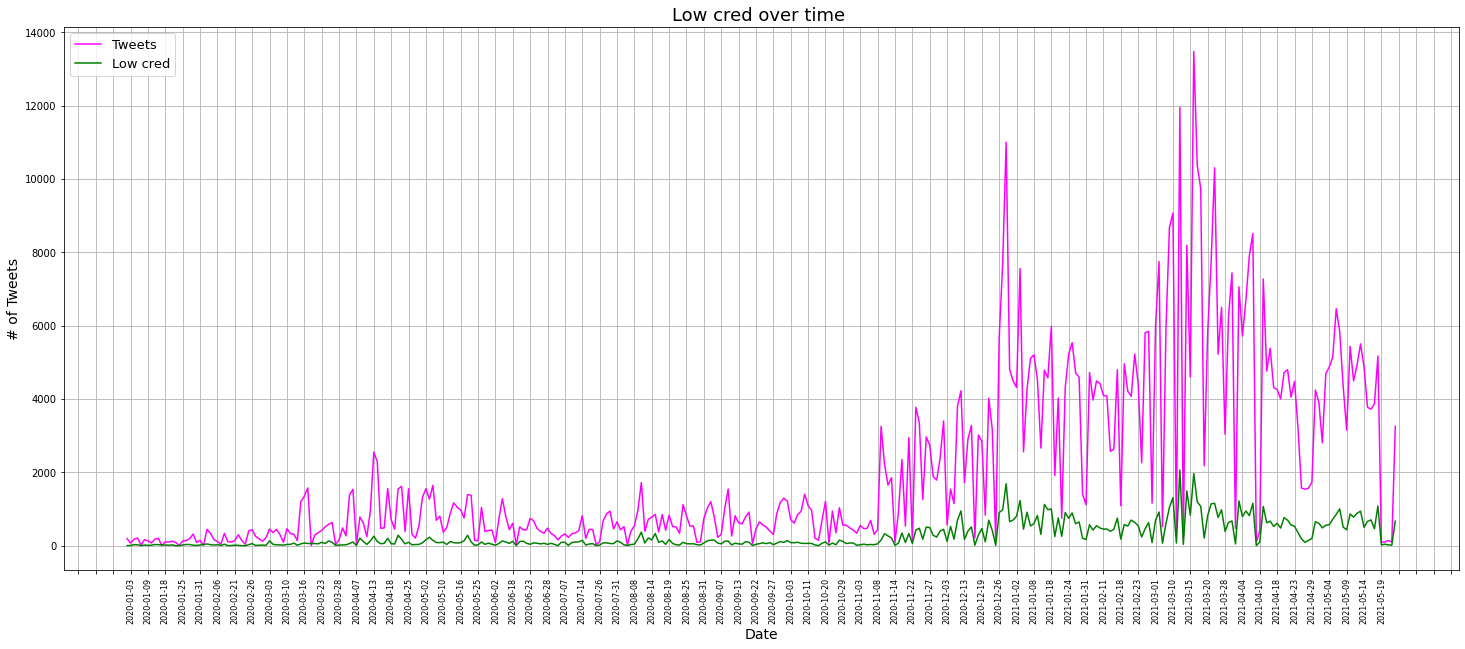

In [57]:
fig, ax = plt.subplots(figsize=(25, 10))
plt.title('Low cred over time ', fontsize=18)
tweets_for_plot.sort_values(by=["dates"], ascending=True, inplace=True)
low_for_plot.sort_values(by=["dates"], ascending=True, inplace=True)
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('# of Tweets', fontsize=14)

# plt.plot(sorted(low['dates']), low['date_tweets'], c='b', label='Low')
plt.plot(tweets_for_plot['dates'], tweets_for_plot['date_tweets'], c='magenta', label='Tweets')
plt.plot(low_for_plot['dates'], low_for_plot['date_tweets'], c='green', label='Low cred')

# set monthly locator
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
# set formatter
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
# set font and rotation for date tick labels
plt.xticks(rotation='vertical', fontsize = 8) 
plt.legend(loc='upper left', fontsize=13);
plt.grid()
plt.show()

In [13]:
good = []
bad = []
number = []
date = []
for i in tqdm(tweets["dates"].unique()):
    general = tweets[tweets["dates"]==i]
    date.append(i)
    good.append(round(general["HIGH"].sum()/general["number_of_urls"].sum()*100,2))
    bad.append(round(general["LOW"].sum()/general["number_of_urls"].sum()*100,2))
    number.append(len(general))


In [59]:
df = pd.DataFrame(list(zip(number,date,bad,good)), columns=["number", "date", "low", "high"])
df.sort_values(by=["date"], ascending=True, inplace=True)

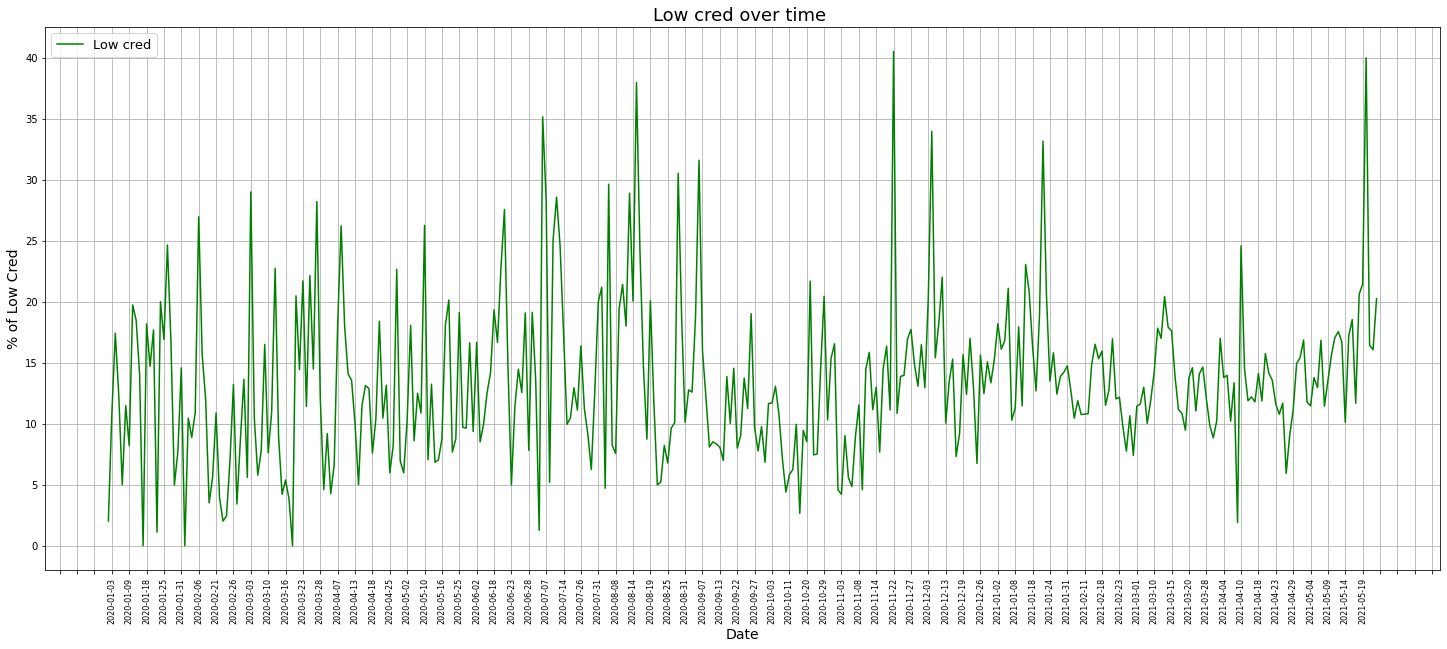

In [60]:
fig, ax = plt.subplots(figsize=(25, 10))
plt.title('Low cred over time ', fontsize=18)

ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('% of Low Cred', fontsize=14)

# plt.plot(sorted(low['dates']), low['date_tweets'], c='b', label='Low')
plt.plot(df['date'], df['low'], c='green', label='Low cred')

# set monthly locator
ax.xaxis.set_major_locator(mdates.DayLocator(interval=5))
# set formatter
# ax.xaxis.set_major_formatter(mdates.DateFormatter('%d-%m-%Y'))
# set font and rotation for date tick labels
plt.xticks(rotation='vertical', fontsize = 8) 
plt.legend(loc='upper left', fontsize=13);
plt.grid()
plt.show()

In [62]:
df.sort_values(by=["low"], ascending=False)

,number,date,low,high
67,156,2020-11-22,40.51,32.91
348,107,2021-05-20,40.00,40.00
230,856,2020-08-15,37.97,24.74
203,264,2020-07-06,35.16,21.25
75,1543,2020-12-04,33.97,25.85
...,...,...,...,...
202,159,2020-07-05,1.26,17.61
18,88,2020-01-21,1.11,25.56
101,8,2020-02-02,0.00,25.00
13,3,2020-01-16,0.00,66.67


In [21]:
# pd.Series(tweets[(tweets["dates"]=="2020-12-04")]["domain"]).value_counts().sort_values(ascending=False)

In [20]:
# pd.Series(tweets[(tweets["dates"]=="2020-12-04")]["text"]).value_counts().sort_values(ascending=False)

# Hashtah - Media low cred

In [19]:
df_low = tweets[tweets["LOW"]/tweets["number_of_urls"]>=0.5]

In [28]:
valore = pd.Series(df_low[df_low["hashtags"]!="[]"]["hashtags"]).value_counts().sort_values(ascending=False)

In [57]:
hashtag = list(valore.index)

In [60]:
for valore in hashtag:
    for i in valore.split("'text'")[1:]:
        lst.append(i.split(",")[0][3:-1])

In [64]:
pd.Series(lst).value_counts().sort_values(ascending=False)[:20]

vaccino             2342
Covid               1496
Vaccino             1254
vaccini             1235
Vaccini              931
Coronavirus          761
AstraZeneca          576
Pfizer               511
coronavirus          455
covid                403
COVID19              372
VACCINO              327
Speranza             305
VaccinoAntiCovid     279
Italia               262
Bassetti             234
Crisanti             226
Arcuri               215
Galli                212
Burioni              209
dtype: int64

# Bad text - hashtags

In [69]:
rt_nt = pd.read_csv("C:/Users/gianl/Desktop/Gi/Supsi/MartaLauraGiada/Laura/Files/names_3.csv")
rt_nt

,Id,Label,Community
0,0,spinassunta,2
1,1,rra_1978,0
2,2,_glam_amour_,0
3,3,massimesso,0
4,4,FriulLibar,2
...,...,...,...
30084,30084,LanzoIgor,0
30085,30085,MariangelaErcu3,2
30086,30086,Efesto51,2
30087,30087,patriziasaggia,0


In [93]:
# merge = tweets.merge(rt_nt, left_on="user_screen_name", right_on="Label", how="left")
bad = merge[merge["Community"]==2]
good = merge[merge["Community"]==0]
giornali = merge[merge["Community"]==3]

In [99]:
lst

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 1.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 1.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 0.0,
 1.0,
 0.0,
 1.0

In [103]:
bad_score = list(bad["LOW"])
bad_values = list(bad["number_of_urls"])
# print(f"{round(bad_score / bad_values,2)*100}%")
lst = []
for i in range(len(bad_score)):
    lst.append(bad_score[i]/bad_values[i])
df = pd.DataFrame(lst, columns=["score"]) 
pd.Series(df["score"]).value_counts().sort_values()

0.600000         1
0.111111         1
0.800000         1
0.200000         2
0.666667         3
0.400000        11
0.250000        13
0.142857        26
0.166667        46
0.333333        57
0.500000       257
1.000000     61414
0.000000    137966
Name: score, dtype: int64

In [84]:
good_score = good["LOW"].sum()
good_values = good["number_of_urls"].sum()
print(f"{round(good_score / good_values,2)*100}%")

2.0%


In [94]:
giornali_score = giornali["LOW"].sum()
giornali_values = giornali["number_of_urls"].sum()
print(f"{round(giornali_score / giornali_values,2)*100}%")

7.000000000000001%
